#Import Library & Dataset

##Import Library

In [45]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.preprocessing import StandardScaler

##Import Dataset dan Analisa awal

In [46]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/gchoi/Dataset/master/OldFaithful.csv')
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


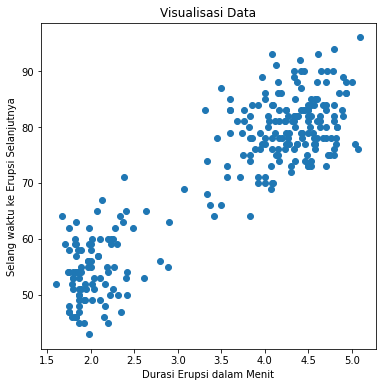

In [48]:
#Plot Data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Durasi Erupsi dalam Menit')
plt.ylabel('Selang waktu ke Erupsi Selanjutnya')
plt.title('Visualisasi Data');

In [22]:
#Menghapus data yang memiliki duplikat
print(f'Size sebelum menghapus duplicate: ', df.shape)
df = df.drop_duplicates().reset_index(drop=True)
print(f'Size sesudah menghapus duplicate: ', df.shape)
df.head()

Size sebelum menghapus duplicate:  (272, 2)
Size sesudah menghapus duplicate:  (256, 2)


,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


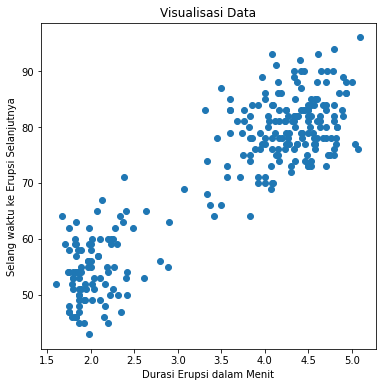

In [50]:
#Plot Data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Durasi Erupsi dalam Menit')
plt.ylabel('Selang waktu ke Erupsi Selanjutnya')
plt.title('Visualisasi Data');

#Algoritma K-Means

In [52]:
class kmeans:
  #Inisialisasi kelas
  def __init__(self, jumlah_kluster, iterasi_maks=100, random_state=123):
    self.jumlah_kluster = jumlah_kluster
    self.iterasi_maks = iterasi_maks
    self.random_state = random_state

  #Inisialisasi Centroid
  def initialisasi_centroid(self, X):
    np.random.RandomState(self.random_state)
    random_idx = np.random.permutation(X.shape[0])
    centroid = X[random_idx[:self.jumlah_kluster]]
    return centroid

  #Menghitung koordinat centroid
  def hitung_centroid(self, X, label):
    centroid = np.zeros((self.jumlah_kluster, X.shape[1]))
    for k in range(self.jumlah_kluster):
      centroid[k, :] = np.mean(X[label == k, :], axis=0)
    return centroid

  #Menghitung jarak titik data terhadap centroid
  def hitung_jarak(self, X, centroid):
    jarak = np.zeros((X.shape[0], self.jumlah_kluster))
    for k in range(self.jumlah_kluster):
      normalisasi_baris = norm(X - centroid[k, :], axis=1)
      jarak[:, k] = np.square(normalisasi_baris)
    return jarak

  #Menentukan cluster yang terdekat
  def temukan_cluster_terdekat(self, jarak):
    return np.argmin(jarak, axis=1)

  #Menghitung SSE (Sum of Squared Distance)
  def hitung_sse(self, X, label, centroid):
    jarak = np.zeros(X.shape[0])
    for k in range(self.jumlah_kluster):
      jarak[label == k] = norm(X[label == k] - centroid[k], axis=1)
    return np.sum(np.square(jarak))

  #Melakukan clustering data
  def fit(self, X):
    self.centroid = self.initialisasi_centroid(X)
    for i in range(self.iterasi_maks):
      centroid_lama = self.centroid
      jarak = self.hitung_jarak(X, centroid_lama)
      self.label = self.temukan_cluster_terdekat(jarak)
      self.centroid = self.hitung_centroid(X, self.label)
      if np.all(centroid_lama == self.centroid):
        break
    self.error = self.hitung_sse(X, self.label, self.centroid)

  #Prediksi kluster data
  def predict(self, X):
     jarak = self.hitung_jarak(X, centroid_lama)
     return self.temukan_cluster_terdekat(jarak)

#Menampilkan Clustering K-Means

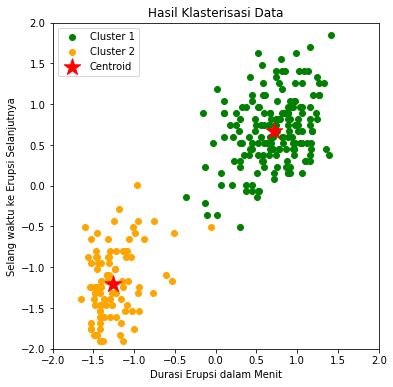

In [58]:
#Standarisasi data
X_std = StandardScaler().fit_transform(df)

#Menjalankan algoritma K-Means dengan jumlah cluster sebanyak 2 cluster
km = kmeans(jumlah_kluster=2, iterasi_maks=100)
km.fit(X_std)
centroid = km.centroid

#Plot hasil klasterisasi
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(X_std[km.label == 0,0], X_std[km.label == 0, 1],
            c='green', label='Cluster 1')
plt.scatter(X_std[km.label == 1, 0], X_std[km.label == 1,1],
            c='orange', label='Cluster 2')
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=300,
            c='red', label='Centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Durasi Erupsi dalam Menit')
plt.ylabel('Selang waktu ke Erupsi Selanjutnya')
plt.title('Hasil Klasterisasi Data');
ax.set_aspect('equal');

#Evaluasi

##Elbow Method

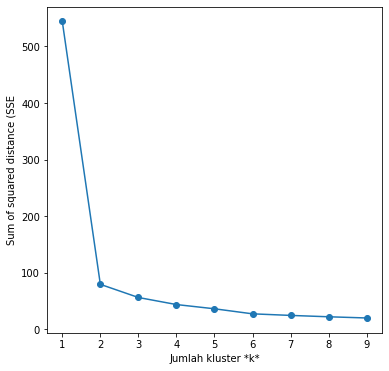

In [60]:
# Jalankan algoritma K-Means dan peroleh indeks kluster data
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = kmeans(jumlah_kluster=k)
    km.fit(X_std)
    sse.append(km.error)

# Plot SSE terhadap k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Jumlah kluster *k*')
plt.ylabel('Sum of squared distance (SSE');